<a href="https://colab.research.google.com/github/SantiagoMerlo/SI-PARCIAL-2/blob/main/parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consigna Parcial
#### Se pide generar el mejor modelo que considere utilizando  una  SVM y otro basado en Redes Neuronales de Backpropagation via tensor flow:
##### Evaluar la posibilidad de definir entre tratamiento adecuado (KtVequilibrado > 1.2) del tratamiento inadecuado (KtV equilibrado <= 1.2) Debe realizar las métricsa de comparacion pertinentes y aplicar los conceptos del paper ClinicalNephr. 

### SVM

In [130]:
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR

In [131]:
style.use("ggplot")
plt.rcParams['figure.figsize'] = (16,9)

### Parametros

In [2]:
TEST_SIZE = 0.2
SEED = 2019

In [3]:
df = pd.read_csv('urea.csv')
df

FileNotFoundError: ignored

## Entendimiento de Datos

In [ ]:
df.shape

#### El dataframe tiene 129 rows y 6 atributos. El evento es la medicion de sangre del paciente. 

In [ ]:
columns = df.columns
columns.to_list()

## Diccionario del Negocio

Upre : Concentración de Urea inicial al tratamiento (tiempo 0)

U120: Concentración de Urea a la mitad del tratamiento (tiempo 120)

Upos : Concentracón de Urea al finalizar el tratamiento (tiempo 240 o Urea post) 

PP : Peso incial del paciente

UF : Pérdida de peso al finalizar el tratamiento.




In [ ]:
df.info()

#### Los atributos son variables numericas continuas. 

In [4]:
df.describe()

NameError: ignored

In [ ]:
description = df.describe().loc[['mean', 'std', 'min', 'max']]
description

In [5]:
for column in df.iteritems():
    ranges_list = description.loc['max'] - description.loc['min'] 
ranges_list

NameError: ignored

In [ ]:
f, axes = plt.subplots(3, 2, figsize=(30, 30), sharex=False)
sns.despine(left=True)

sns.distplot(df['Upre'],
             hist=True, 
             kde=True,
             color='red',
             ax=axes[0, 0])

sns.distplot(df['U120'],
             hist=True, 
             kde=True,
             color='red',
             ax=axes[0, 1])

sns.distplot(df['Upos'],
             hist=True, 
             kde=True,
             color='red',
             ax=axes[1, 0])

sns.distplot(df['PP'],
             hist=True, 
             kde=True,
             color='red',
             ax=axes[1, 1])

sns.distplot(df['UF'],
             hist=True, 
             kde=True,
             color='red',
             ax=axes[2, 0])

sns.distplot(df['Ueq'],
             hist=True, 
             kde=True,
             color='red',
             ax=axes[2, 1])

plt.show()

In [6]:
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1)

plt.show()

NameError: ignored

### Valores Nan

In [ ]:
df.isna().sum()

#### Por suerte no hay valores nulos en la base de datos. 

### Outliers



def plot_oultiers(data, mascaras):
    
    classes = sorted(np.unique(y_data))
    f, ax = plt.subplots(1,1, figsize=(12, 4))
    g = sns.boxplot(data=rating_zscore_df[mascara_3_sigmas])
    g.set_title('Rating Z-Score con 3 sigmas')
    
    for p, label in zip(g.patches, classes):
        g.annotate(LABELS[label], (p.get_x(), p.get_height() + 0.2))
    
    plt.show()

In [7]:
sns.boxplot(df['Ueq'])

NameError: ignored

In [8]:
sns.boxplot(df['UF'])

NameError: ignored

In [ ]:
sns.boxplot(df['PP'])

In [9]:
sns.boxplot(df['Upos'])

NameError: ignored

In [ ]:
sns.boxplot(df['Upre'])

In [10]:
sns.boxplot(df['U120'])

NameError: ignored

#### Vamos a corregir los outliers

In [ ]:
scaler = StandardScaler()

In [11]:
# Aprendemos sobre nuestros datos, no olvidemos el reshape!
scaler.fit(df['Upre'].values.reshape(-1, 1))

# Ahora transformamos los datos
duration_zscore = scaler.transform(df['Upre'].values.reshape(-1, 1))

# Guardemoslo en un dataframe
duration_zscore_df = pd.DataFrame(duration_zscore, columns=['Upre'])

# Y si filtramos con las tablas de z-score
# Si filtramos aquellos valores mayores a 2, estamos considerando el 99% de la distribucion
mascara_z_score = np.abs(duration_zscore_df) < 2
sns.boxplot(data=duration_zscore_df[mascara_z_score]).set_title('Duration Z-Score, threshold: 2')
plt.show()

df['UF']

NameError: ignored

In [ ]:
scaler.fit(df['UF'].values.reshape(-1, 1))

# Ahora transformamos los datos
duration_zscore = scaler.transform(df['UF'].values.reshape(-1, 1))

# Guardemoslo en un dataframe
duration_zscore_df = pd.DataFrame(duration_zscore, columns=['UF'])

# Y si filtramos con las tablas de z-score
# Si filtramos aquellos valores mayores a 2, estamos considerando el 99% de la distribucion
mascara_z_score = np.abs(duration_zscore_df) < 2
sns.boxplot(data=duration_zscore_df[mascara_z_score]).set_title('Duration Z-Score, threshold: 2')
plt.show()

## Hay que escalar con MaxMin?

### Preprocesing data

In [ ]:
X, Y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=SEED)

print('Tamaño X_train: {}'.format(X_train.shape))
print('Tamaño Y_train: {}'.format(Y_train.shape))
print('Tamaño X_test: {}'.format(X_test.shape))
print('Tamaño Y_test: {}'.format(Y_test.shape))

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: ignored

## Modelo

In [13]:
model = SVR()
model.fit(X_train, Y_train)

NameError: ignored

In [ ]:
# Obtengamos predicciones para el conjunto de test
train_y_pred = model.predict(X_train)
train_acc = accuracy_score(Y_train, train_y_pred)
print('+ Accuracy en train: {:.4f}'.format(train_acc))
test_y_pred = model.predict(X_test)
test_acc = accuracy_score(Y_test, test_y_pred)
print('+ Accuracy en test: {:.4f}'.format(test_acc))

In [14]:
# Definimos un conjunto de paremetros a combinar y usar
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

# Creamos el modelo para probarlos
tuned_model = GridSearchCV(SVC(C=1),          # Clasificador base
                           tuned_parameters,  # Parametros a probar
                           cv=5,              # 5-fold cross validation
                           scoring='accuracy')

# Se entrenara utilizando 5-fold cross validation en el conjunto de entrenamiento
tuned_model.fit(X_train, Y_train)

print('Mejores parametros: {}'.format(tuned_model.best_params_))
print('Accuracy: {:.4f}'.format(tuned_model.best_score_))

NameError: ignored

In [ ]:
# Entrenamos el modelo final con los parametros obtenidos
model = SVC(C=10, gamma=0.01, kernel='rbf')
model.fit(X_train, Y_train)

# Evaluamos los resultados
test_y_pred = model.predict(X_test)
test_acc = accuracy_score(Y_test, test_y_pred)
print('+ Accuracy en test: {:.4f}'.format(test_acc))

# Redes

In [67]:
TEST_SIZE = 0.25

In [121]:
!wget "https://raw.githubusercontent.com/SantiagoMerlo/SI-PARCIAL-2/main/dataset.csv"

--2021-05-21 18:46:06--  https://raw.githubusercontent.com/SantiagoMerlo/SI-PARCIAL-2/main/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4424 (4.3K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]   4.32K  --.-KB/s    in 0s      

2021-05-21 18:46:06 (49.8 MB/s) - ‘dataset.csv’ saved [4424/4424]



In [124]:
df = pd.read_csv("./dataset.csv", sep=",")
df.sample(3)

,Upre,U120,Upos,PP,UF,Ueq,centro,Ktveq
81,171,94,43,60.5,3.1,60.0,0,1.293971
57,164,108,73,71.3,2.5,97.0,1,0.658814
91,145,83,62,88.5,5.5,64.0,0,1.059410


In [125]:
df.describe()

,Upre,U120,Upos,PP,UF,Ueq,centro,Ktveq
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,148.149606,79.779528,54.992126,72.851181,2.747244,61.791339,0.456693,1.089479
std,35.314478,23.973502,18.389307,17.513967,1.190960,19.863766,0.500094,0.289227
min,59.000000,28.000000,21.000000,39.000000,0.000000,20.000000,0.000000,0.459759
25%,124.000000,64.000000,41.500000,59.750000,2.000000,48.750000,0.000000,0.888222
50%,146.000000,77.000000,50.000000,72.600000,2.700000,59.000000,0.000000,1.067816
75%,166.500000,96.000000,68.000000,85.150000,3.450000,76.000000,1.000000,1.246382
max,247.000000,144.000000,98.000000,119.000000,6.000000,112.000000,1.000000,1.805728


In [126]:
df["TratCorrect"] = df["Ktveq"].apply(lambda x: 1 if x > 1.2 else 0)

In [30]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

In [216]:
labels = ["Upre", "Upos",	"PP",	"UF",	"Ueq"]
INPUT_SIZE = (len(labels),)

In [217]:
X, Y = df[labels], df["TratCorrect"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=SEED)

In [218]:
model = keras.Sequential([
          Input(INPUT_SIZE),
          Dense(INPUT_SIZE[0],"relu"),
          Dropout(0.2),
          Dense(2,"relu"),
          Dense(1,"sigmoid")
        ])
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [219]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 5)                 30        
_________________________________________________________________
dropout_21 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_64 (Dense)             (None, 2)                 12        
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 3         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [220]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150, verbose=0)

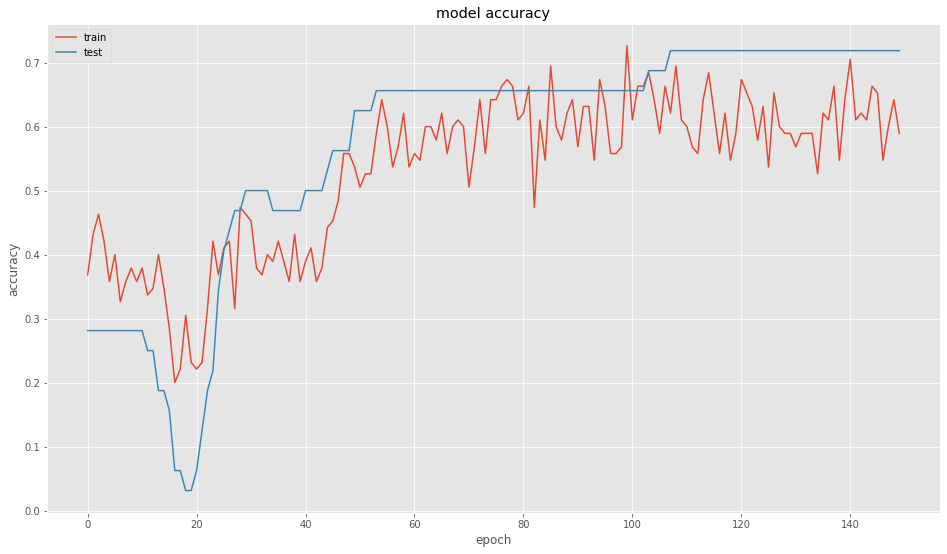

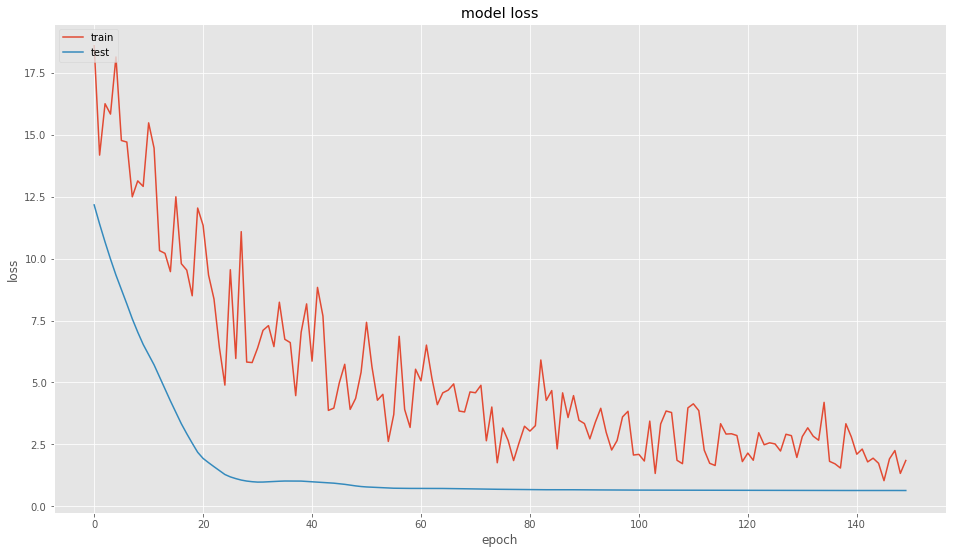

In [221]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

plot_accuracy(history)

In [230]:
results = model.evaluate(X_test, Y_test)
print("test loss, test acc:", results)

1/1 [==============================] - 0s 16ms/step - loss: 0.6423 - accuracy: 0.7188
test loss, test acc: [0.6423171758651733, 0.71875]


In [224]:
from sklearn.metrics import confusion_matrix

In [231]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [233]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [237]:
matrix = confusion_matrix(Y_test, y_pred)
pd.DataFrame(matrix)

,0,1
0,23,0
1,9,0
